### Import Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

### Import DataSet


In [3]:
creditcardData=pd.read_csv("credit-approval_csv.csv")
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [4]:
creditcardData["Approved_Status"].unique()

array(['Approved', 'Not Approved'], dtype=object)

In [5]:
creditcardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           678 non-null    object 
 1   Age              678 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          684 non-null    object 
 4   BankCustomer     684 non-null    object 
 5   EducationLevel   681 non-null    object 
 6   Ethnicity        681 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          677 non-null    float64
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
 16  Approved_Status  690 non-null    object 
dtypes: float64(4), i

#### Observations
1. Approved_Status is the response variable


--- 
2. There are some NULL values in the dataset, we need to explore more on those predictors to decide:
- straight away drop all the NULL values   OR
- fill the NULL values with median or mode

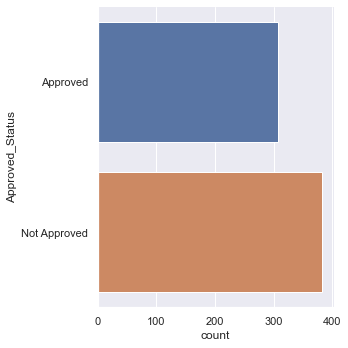

In [6]:
sb.catplot(y="Approved_Status",data=creditcardData,kind="count")

In [7]:
No_notapproved,No_approved=creditcardData["Approved_Status"].value_counts()
print("Ratio of Approved:Not_Approved=",No_approved,":",No_notapproved)
print("Approved percentage: {0:.2f} %".format((No_approved/(No_notapproved+No_approved))*100))

Ratio of Approved:Not_Approved= 307 : 383
Approved percentage: 44.49 %


We see that the percentage of approved credit card is  44.49%, which is slightly less than 50%. We need more information to predict the approval of a credit card, if not its just like a naive guess.

---

### Numeric predictors

In [8]:
creditcardDataInt = creditcardData.loc[:, creditcardData.dtypes == np.int64]
creditcardDataInt.describe()

,CreditScore,Income
count,690.00000,690.000000
mean,2.40000,1017.385507
std,4.86294,5210.102598
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,5.000000
75%,3.00000,395.500000
max,67.00000,100000.000000


In [9]:
creditcardDataFlt = creditcardData.loc[:, creditcardData.dtypes == np.float64]
creditcardDataFlt.describe()

,Age,Debt,YearsEmployed,ZipCode
count,678.000000,690.000000,690.000000,677.000000
mean,31.568171,4.758725,2.223406,184.014771
std,11.957862,4.978163,3.346513,173.806768
min,13.750000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,75.000000
50%,28.460000,2.750000,1.000000,160.000000
75%,38.230000,7.207500,2.625000,276.000000
max,80.250000,28.000000,28.500000,2000.000000


---

### Categorical Predictor

In [10]:
creditcardDataStr = creditcardData.loc[:, creditcardData.dtypes == object]
creditcardDataStr.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
count,678,684,684,681,681,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2,2
top,b,u,g,c,v,t,f,f,g,-,Not Approved
freq,468,519,519,137,399,361,395,374,625,383,383


In [11]:
print("Discovering the values of EducationLevel")
creditcardData["EducationLevel"].value_counts()

Discovering the values of EducationLevel


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [12]:
print("Discovering the values of Ethnicity")
creditcardData["Ethnicity"].value_counts()

Discovering the values of Ethnicity


v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

Variables "EducationLevel" and "Ethnicity" have too many ambiguous value. After checking the dataset source, we knew that most of the people do not want to disclose these info as they are confidential. Therefore, we will drop this variables out of our predictors.


---

In [13]:
todrop=["EducationLevel","Ethnicity"]
ccData=creditcardData.drop(columns=todrop)
ccData.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,1.71,t,f,0,f,s,120.0,0,+,Approved


In [14]:
ccData.dropna(inplace=True)
ccData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 689
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           654 non-null    object 
 1   Age              654 non-null    float64
 2   Debt             654 non-null    float64
 3   Married          654 non-null    object 
 4   BankCustomer     654 non-null    object 
 5   YearsEmployed    654 non-null    float64
 6   PriorDefault     654 non-null    object 
 7   Employed         654 non-null    object 
 8   CreditScore      654 non-null    int64  
 9   DriversLicense   654 non-null    object 
 10  Citizen          654 non-null    object 
 11  ZipCode          654 non-null    float64
 12  Income           654 non-null    int64  
 13  Approved         654 non-null    object 
 14  Approved_Status  654 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 81.8+ KB


In [15]:
print("After dropping all the NULL value in the dataset, {0:.2f}% of data dropped".format(((690-654)/690)*100))
print("")

After dropping all the NULL value in the dataset, 5.22% of data dropped



### Visualisation part ! with data related to credit & related to customer

<AxesSubplot:>

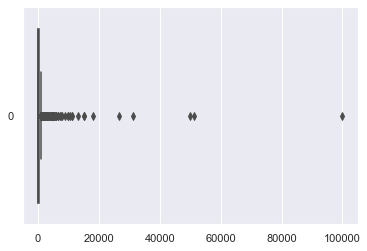

In [18]:
sb.boxplot(data=creditcardData["Income"],orient='h')